# Trabajo Práctico - Programación para el Análisis de Datos

**Grupo 3:**
- Ana Clara Ordoñez  
- Juan Agustin Kissner  
- Guillermo San Martin  
- Giuliano Tessarolo  
- Agustina Kemerer  

**Dataset elegido:** Superstore.csv

**Objetivo:** Evaluar rentabilidad por región, categoría y segmento para detectar oportunidades de mejora en la asignación de recursos.
-¿Qué categorías y subcategorías de productos generan más ventas y ganancias?

-¿Qué segmento de clientes (Consumer, Corporate o Home Office) realiza más compras?

-¿En qué regiones se concentran las mayores ganancias o pérdidas?

-¿Cómo evolucionan las ventas a lo largo del tiempo (por mes o año)?

-¿Qué impacto tienen los descuentos en la rentabilidad?

A partir de estas preguntas, iremos realizando distintos análisis y visualizaciones que nos permitan detectar oportunidades de mejora en precios, promociones y estrategias comerciales.

In [ ]:
# Importo las librerias que voy a usar
import pandas as pd # Con esta libreria analizamos csv, leemos datos, etc
import matplotlib.pyplot as plt # libreria para graficos
import seaborn as sns # libreria para graficos 
# Cargar el dataset Superstore desde la carpeta Data
df = pd.read_csv("Data/Superstore.csv", encoding="windows-1252")

# Mostrar las primeras filas del csv y desc
from IPython.display import display

display(df.head())
df.info()
display(df.describe())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Análisis inicial del dataset Superstore

En esta sección importamos el dataset y revisamos su estructura para entender con qué datos vamos a trabajar. 

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Descripción de las variables del dataset Superstore

A continuación se detallan las columnas disponibles en el dataset y su significado:

- **Row ID**: identificador único de cada fila.
- **Order ID**: identificador único de cada pedido realizado.
- **Order Date**: fecha en la que se realizó el pedido.
- **Ship Date**: fecha en la que se envió el producto.
- **Ship Mode**: modo de envío seleccionado por el cliente (estándar, exprés, etc.).
- **Customer ID**: identificador único de cada cliente.
- **Customer Name**: nombre del cliente.
- **Segment**: segmento del cliente (ej. consumidor, corporativo, home office).
- **Country**: país de residencia del cliente.
- **City**: ciudad de residencia del cliente.
- **State**: estado o provincia de residencia del cliente.
- **Postal Code**: código postal del cliente.
- **Region**: región geográfica (West, East, Central, South).
- **Product ID**: identificador único de cada producto.
- **Category**: categoría principal del producto (ej. muebles, tecnología, etc.).
- **Sub-Category**: subcategoría más específica del producto.
- **Product Name**: nombre del producto.
- **Sales**: monto de la venta (en USD).
- **Quantity**: cantidad de productos vendidos en la transacción.
- **Discount**: descuento aplicado en la venta.
- **Profit**: ganancia o pérdida asociada a la venta.

##Limpieza de datos
Antes del análisis verificamos si hay valores nulos, duplicados o inconsistencias.

In [7]:
display(df.isnull().sum())
display(df.duplicated().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

np.int64(0)

In [4]:
#que categoria tiene mas filas en el archivo?
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [14]:
#ventas (usd) por categoria
df.groupby("Category")["Sales"].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [15]:
#ganancia por cat
df.groupby("Category")["Profit"].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

-Primero veo que prod de oficina tiene mas incidencias en el dataset ( Rubro con mas incidencias)
-Luego veo que en cuestion de ventas, tecnologia es lo mas vendido
-Por ultimo lo que mas deja ganancia es Tecnologia (Rubro mas rentable)

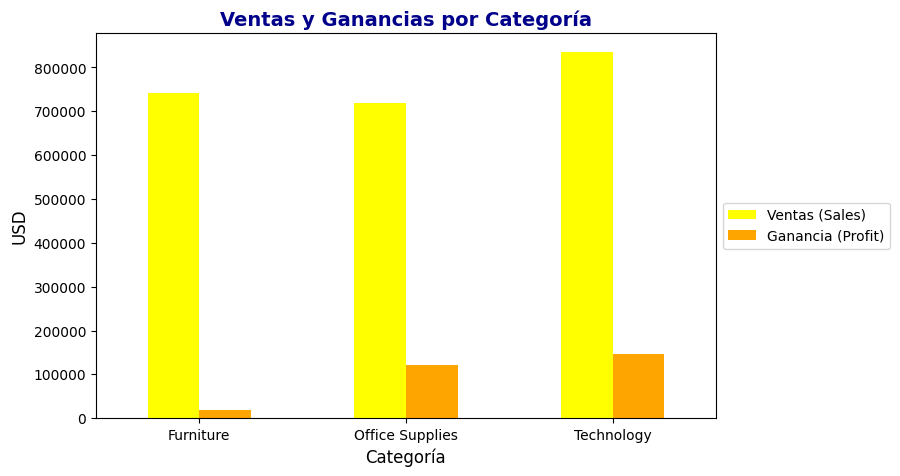

In [ ]:

# Agrupamos por categoría y sacamos ventas y ganancias
cate_estadistica = df.groupby("Category")[["Sales", "Profit"]].sum()

# Gráfico de barras
cate_estadistica.plot(
    kind="bar",
    figsize=(8,5),
    color=["yellow", "orange"]  # un color para Sales y otro para Profit
)

plt.title("Ventas y Ganancias por Categoría", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("USD", fontsize=12)
plt.xticks(rotation=0)
plt.legend(
    ["Ventas (Sales)", "Ganancia (Profit)"], 
    loc="center left", 
    bbox_to_anchor=(1, 0.5)  # la muevo afuera a la derecha
)
plt.show()

## Exponemos ganancia por región

In [86]:
profit_region=df.groupby('Region')['Profit'].sum().sort_values(ascending=False) #creo una variable
profit_region # la muestro

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

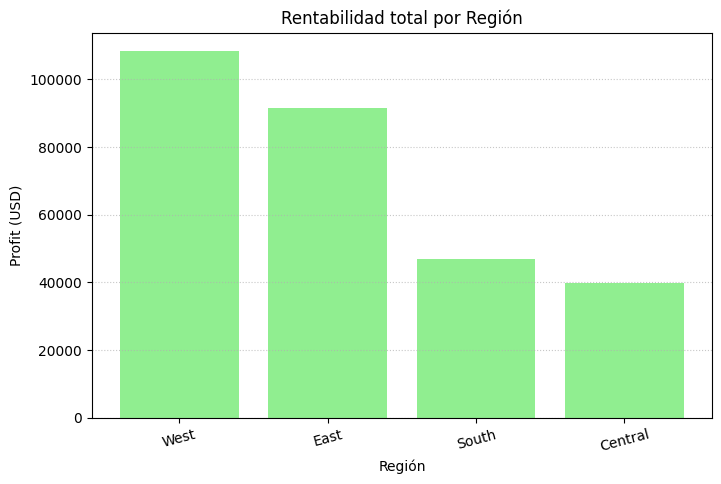

In [87]:
profit_region = profit_region.reset_index() #Quedaba region como indice y no como columna

colores = ['lightgreen' if x > 0 else 'red' for x in profit_region['Profit']]


plt.figure(figsize=(8,5))
plt.bar(profit_region['Region'], profit_region['Profit'], color=colores)
plt.title('Rentabilidad total por Región')
plt.xlabel('Región')
plt.ylabel('Profit (USD)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.show()

## Rentabilidad total por región

En el gráfico se observa la ganancia total obtenida en cada región.
Las barras están en verde cuando la rentabilidad es positiva y en rojo si fuera negativa.

Se puede ver que la región West es la más rentable del negocio, seguida por East.
En cambio, Central y South presentan ganancias más moderadas, aunque todavía positivas.

Este análisis ayuda a orientar decisiones comerciales y de inversión, ya que permite identificar dónde conviene asignar más recursos (por ejemplo, reforzando la presencia en las zonas más rentables) y dónde revisar estrategias de venta o costos logísticos.

El desempeño regional puede estar influido por factores como el mix de productos, el tipo de cliente predominante

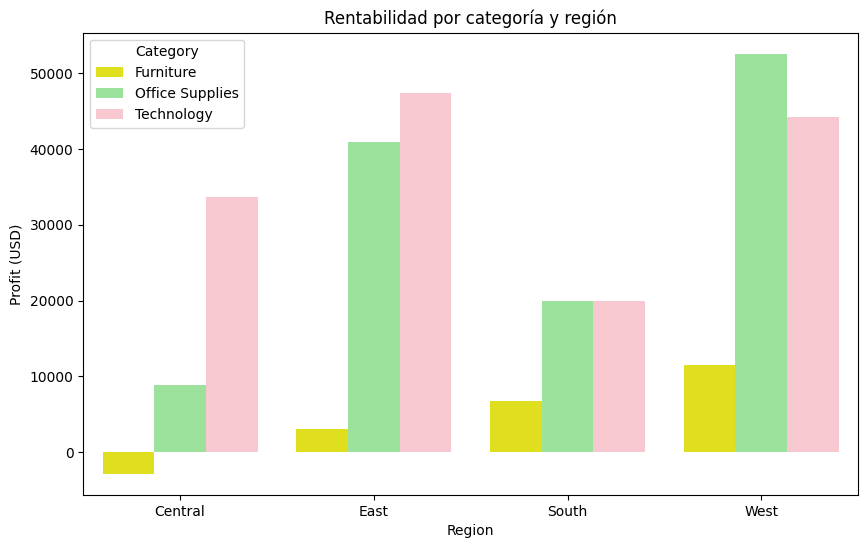

In [90]:
rent_region_cat = df.groupby(['Region', 'Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=rent_region_cat, x='Region', y='Profit', hue='Category', palette=('yellow', 'lightgreen', 'pink'))
plt.title('Rentabilidad por categoría y región')
plt.ylabel('Profit (USD)')
plt.show()

En West,  Technology es la categoria que más aporta a la ganancia, mientras que en Central, Furniture tiene resultados negativos. Esto puede orientar estrategias comerciales específicas por zona.

Posibles estrategias comerciales según los hallazgos

Región West (más rentable)
Foco en expansión y fidelización.
Reforzar productos tecnológicos, mantener programas de clientes frecuentes y optimizar stock y logística.
Conclusión: consolidar y potenciar lo que ya funciona.

Región East (segunda más rentable)
Foco en crecimiento.
Ampliar oferta de subcategorías rentables, impulsar marketing local y cuidar márgenes ajustando descuentos.
Conclusión: mantener equilibrio entre volumen y rentabilidad.

Región South (rentabilidad media-baja)
Foco en eficiencia.
Reducir costos logísticos, ofrecer promociones cruzadas y concentrarse en productos rentables.
Conclusión: ajustar estructura de costos y mejorar rentabilidad.

Región Central (menos rentable)
Foco en corrección y reposicionamiento.
Revisar precios y proveedores, limitar descuentos, impulsar acciones locales y evaluar centralizar envíos.
Conclusión: revisar precios, costos y promoción local.

## Exponemos rentabilidad por segmento de cliente

In [36]:
profit_segment = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
profit_segment


Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

In [37]:
profit_segment = profit_segment.reset_index() # Porque antes quedo indexado - por las dudas-

## Grafico de barra por segmentos de clientes

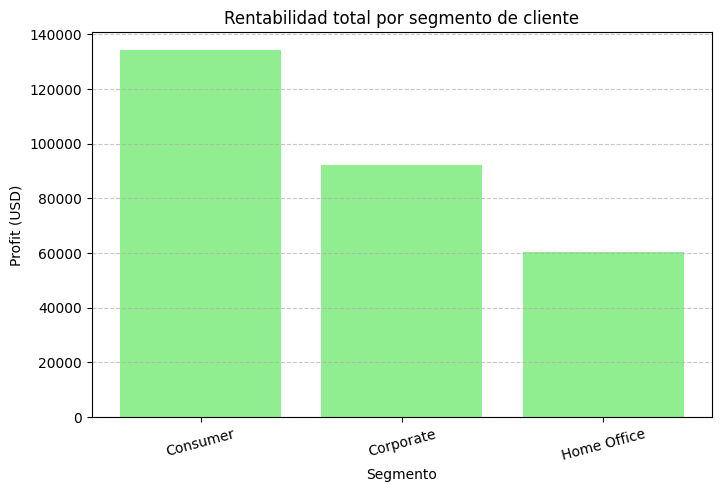

In [44]:
# Colores suaves: verde pastel si hay ganancia, rojo coral si hubiera pérdida
colores = ['lightgreen' if x > 0 else 'red' for x in profit_segment['Profit']]

plt.figure(figsize=(8,5))
plt.bar(profit_segment['Segment'], profit_segment['Profit'], color=colores)
plt.title('Rentabilidad total por segmento de cliente')
plt.xlabel('Segmento')
plt.ylabel('Profit (USD)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Doble click para ver margenes

In [ ]:
segment_profit = df.groupby('Segment')[['Sales', 'Profit']].sum()
segment_profit['Margen'] = segment_profit['Profit'] / segment_profit['Sales']
segment_profit.sort_values(by='Profit', ascending=False)

,Sales,Profit,Margen
Segment,,,
Consumer,1.161401e+06,134119.2092,0.115481
Corporate,7.061464e+05,91979.1340,0.130255
Home Office,4.296531e+05,60298.6785,0.140343


## Rentabilidad por segmento de cliente

El gráfico muestra la ganancia total obtenida según el tipo de cliente.
Se puede ver que el segmento Consumer es el más rentable, seguido por Corporate, mientras que Home Office representa la menor parte de las ganancias.

Esto tiene sentido porque los consumidores individuales suelen ser mayoría en volumen de compras, aunque los clientes corporativos pueden generar operaciones de mayor valor por pedido.
El grupo Home Office aparece como un nicho más pequeño, probablemente formado por profesionales independientes o personas que trabajan desde casa.

Analizar la rentabilidad por segmento ayuda a definir estrategias comerciales más específicas, como promociones distintas para cada tipo de cliente o políticas de descuento adaptadas al perfil de compra. *Columna Discount*

## Exponemos rentabilidad por sub-categoria

In [39]:
profit_subcat = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False) # Borramos el index aca
profit_subcat

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


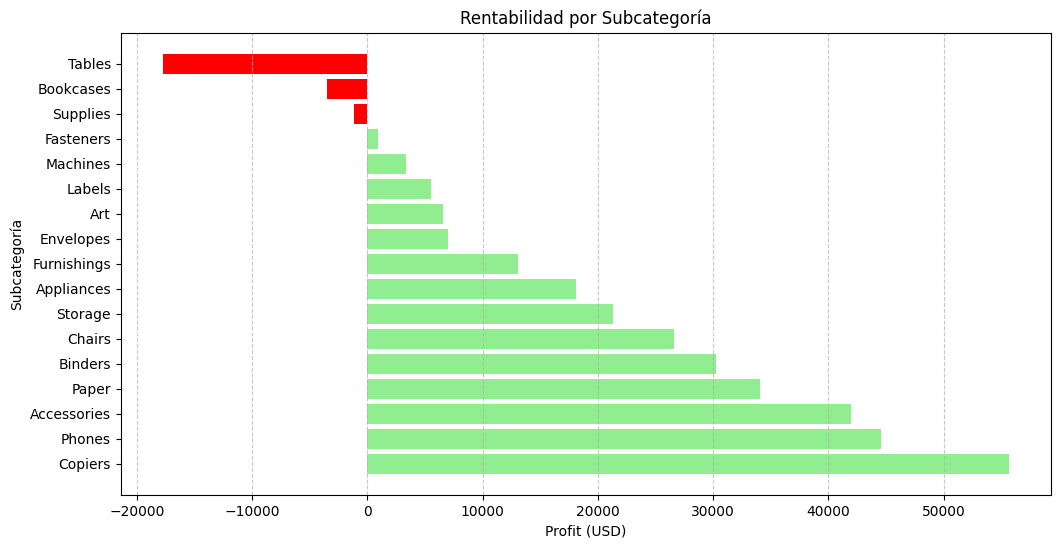

In [45]:
# Colores: verde si hay ganancia, rojo si hay pérdida
colores = ['lightgreen' if x > 0 else 'red' for x in profit_subcat['Profit']]

plt.figure(figsize=(12,6))
plt.barh(profit_subcat['Sub-Category'], profit_subcat['Profit'], color=colores)
plt.title('Rentabilidad por Subcategoría')
plt.xlabel('Profit (USD)')
plt.ylabel('Subcategoría')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Rentabilidad por subcategoría

En este gráfico se puede ver qué subcategorías aportan más ganancia y cuáles generan pérdida.
Las barras en verde representan las que son rentables y las rojas las que presentan pérdidas.

Se destacan algunos productos como los teléfonos y las sillas entre los más rentables, mientras que otras subcategorías, como mesas o suministros, muestran pérdidas.
Esto puede deberse a costos altos, descuentos aplicados o baja rotación de ventas.

El análisis ayuda a identificar en qué líneas de producto conviene mantener o aumentar la inversión y en cuáles sería necesario revisar precios, descuentos o estrategias comerciales.

## Descuentos vs Ganancia

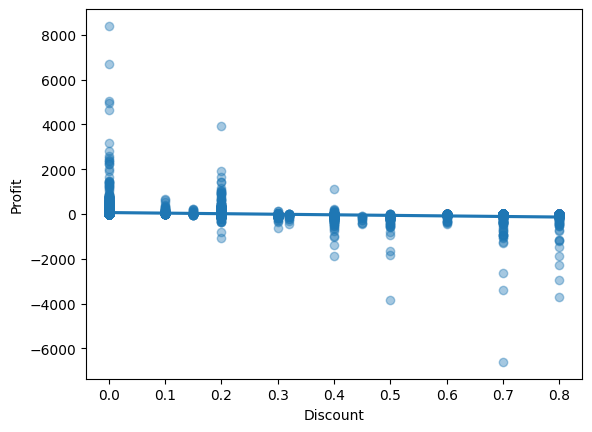

In [58]:
sns.regplot(x='Discount', y='Profit', data=df, scatter_kws={'alpha':0.4});

## Relación entre descuento y ganancia
En el gráfico se observa una clara relación inversa entre el descuento aplicado y la ganancia obtenida.
Las ventas con poco o ningún descuento concentran la mayor rentabilidad, mientras que los descuentos superiores al 50 % suelen generar pérdidas.
Esto sugiere que las políticas de descuento elevadas no resultan rentables para el negocio.

## Relación Descuento / Ganancia / Categoría

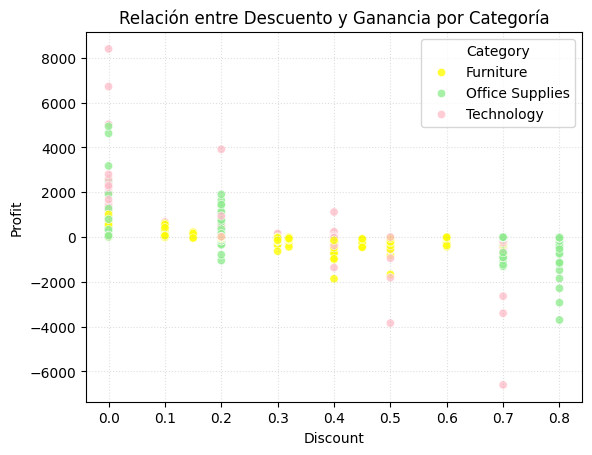

In [ ]:
sns.scatterplot( # grafico de dispersion porque los demas no se ven claros con estos datos
    data=df, #usa el datagrame csv del super como dato de entrada
    x='Discount', # eje x
    y='Profit',  # eje y
    hue='Category', # coloreá de acuerdo a categoria
    alpha=0.8, # de 0 a 1 cuan nitido lo vemos
    palette=('yellow', 'lightgreen', 'pink')) 
plt.title('Relación entre Descuento y Ganancia por Categoría')
plt.grid(True, linestyle=':', alpha=0.4) # true para ver la cuadricula y luego punteada
plt.show()

## Impacto del descuento en la rentabilidad

Al analizar la relación entre el descuento y la ganancia por categoría, se observa que los descuentos altos tienden a reducir significativamente la rentabilidad.  
Si bien Technology mantiene buenos márgenes en descuentos moderados, cuando las rebajas superan el 50 %, la pérdida de ganancia se vuelve más pronunciada que en Office Supplies.  
Esto sugiere que, aunque la tecnología sea una categoría rentable, es también más sensible a los descuentos extremos.  
En cambio, Office Supplies presenta un comportamiento más estable pero con márgenes más bajos en general.

## Ventas x año

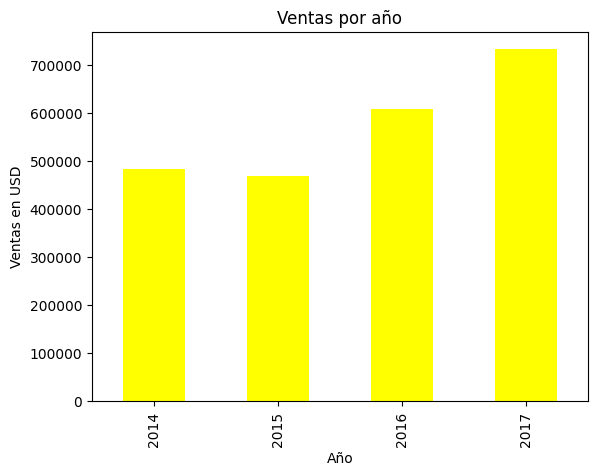

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date']) #pasamos datos de string a formato date
df['Year'] = df['Order Date'].dt.year #usamos el atributo de acceso dt para parte de la fecha
df['Year'].value_counts() #contamos filas x año
ventas_por_año = df.groupby('Year')['Sales'].sum() #sumamos ventas x año tipo en tabla dinámica
ventas_por_año.plot(kind='bar', color='yellow', title='Ventas por año') 
plt.xlabel('Año')
plt.ylabel('Ventas en USD');

## Ventas mensuales

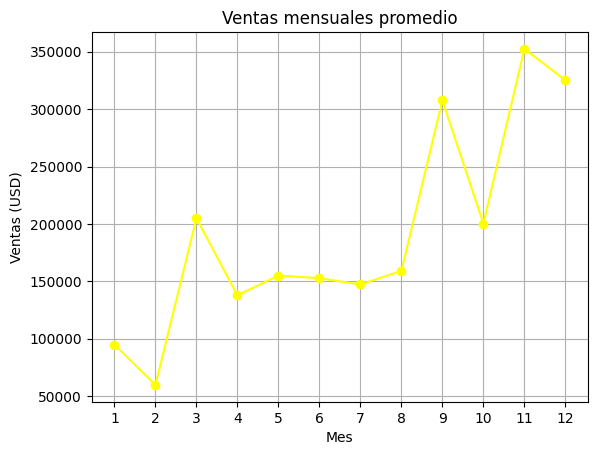

In [ ]:
# Creo una nueva columna con el número de mes
df['Month'] = df['Order Date'].dt.month

# Agrupo las ventas por mes
sales_by_month = df.groupby('Month')['Sales'].sum()

# Grafico las ventas mensuales
sales_by_month.plot(kind='line', marker='o', color='yellow')

plt.title('Ventas mensuales promedio')
plt.xlabel('Mes')
plt.xticks(ticks=range(1,13)) # que me ponga los doce meses 
plt.ylabel('Ventas (USD)')
plt.grid(True)
plt.show()

## Estacionalidad en ventas ( por mes )
Se observa un aumento significativo en las ventas durante noviembre, seguido de un alto nivel también en diciembre.
Esto probablemente se deba a campañas comerciales de fin de año (como Black Friday o Navidad), que impulsan la demanda.
Este comportamiento muestra una fuerte estacionalidad, por lo que sería conveniente reforzar el stock y las promociones en ese período para aprovechar el incremento de ventas.

# Conclusión
Hemos explorado diferentes dimensiones del negocio con el objetivo de entender qué factores influyen en la rentabilidad general. Se evaluaron las ventas por categoría, subcategoría, segmento de clientes, descuentos aplicados, desempeño regional y evolución temporal.

Se observó que la categoría Technology es la más rentable, impulsada por productos de alto margen y fuerte demanda en todos los segmentos. Furniture, en cambio, presenta las mayores pérdidas, principalmente por el bajo rendimiento de subcategorías como mesas, donde los descuentos elevados impactan de forma negativa en la ganancia. Esto evidencia que, aunque los descuentos aumentan el volumen de ventas, no siempre generan beneficios reales.

En cuanto a los segmentos, el grupo Consumer concentra la mayor cantidad de compras y ventas. Sin embargo, el análisis mostró que los segmentos más grandes no siempre son los más rentables, lo cual refuerza la necesidad de diferenciar estrategias comerciales según el tipo de cliente.

En el análisis temporal se identificó un fuerte pico de ventas en noviembre, coincidente con eventos promocionales como el Black Friday, lo que sugiere un patrón estacional en el comportamiento de compra. Este hallazgo es útil para planificar campañas y ajustar el stock de productos tecnológicos durante los meses de mayor demanda.

Desde el punto de vista geográfico, las regiones West y East se destacan como las más rentables. Estas diferencias reflejan tanto la concentración de ventas como posibles variaciones en costos logísticos y estrategias de precio. En función de estos resultados se propusieron líneas de acción específicas para cada región, orientadas a potenciar lo que funciona y corregir las áreas de menor desempeño.


En síntesis, el análisis permitió identificar que la rentabilidad está fuertemente influenciada por la combinación de tres factores: el tipo de producto, el segmento del cliente y el nivel de descuento aplicado. Las decisiones futuras deberían priorizar la optimización del mix de productos, el control de los descuentos y la focalización de esfuerzos comerciales en las zonas y categorías de mayor retorno. De esta forma, la empresa podría mejorar su margen general sin depender únicamente del aumento del volumen de ventas.